# MFCC Extraction with [Librosa](https://librosa.org/doc/latest/index.html) and Kaldi
## Speech and Language Understanding Exercises (SLU) Summer 2021
## Exercise 2
- Import and visual audio file with librosa
- Extract Melspectrogram and MFCC with librosa
- Examine/visualize features
- Extract MFCC with Kaldi

# Import and visualize audio file with Librosa

In [1]:
import librosa #librosa is a python package for music and audio analysis.
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio 
import numpy as np

/Applications/anaconda3/lib/python3.10/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
/Applications/anaconda3/lib/python3.10/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)


### [Sox](http://sox.sourceforge.net/) is another useful tool for speech processing. You can quickly examine your audio file using 'soxi'

In [9]:
%cd docker

[Errno 2] No such file or directory: 'docker'
/Users/asmafaraj/Downloads/KaldiSpeechProcessing/Feature Extraction


In [4]:
!soxi /opt/kaldi/torgo_dataset/MC01/Session2/wav_arrayMic/MC01_2_array_0360.wav

soxi FAIL formats: can't open input file `/opt/kaldi/torgo_dataset/MC01/Session2/wav_arrayMic/MC01_2_array_0360.wav': No such file or directory


In [5]:
audio = "/opt/kaldi/torgo_dataset/MC01/Session2/wav_arrayMic/MC01_2_array_0360.wav"
# November
Audio(data=audio)

ValueError: rate must be specified when data is a numpy array or list of audio samples.

### Load audio file (make sure to pass the correct sampling rate since the default is 22500)

In [4]:
y, sr = librosa.load(audio, sr=16000)
print(y)
print(sr)

[-0.00067139 -0.00091553 -0.00100708 ... -0.00222778 -0.00286865
 -0.00210571]
16000


### Visualizing waveform 

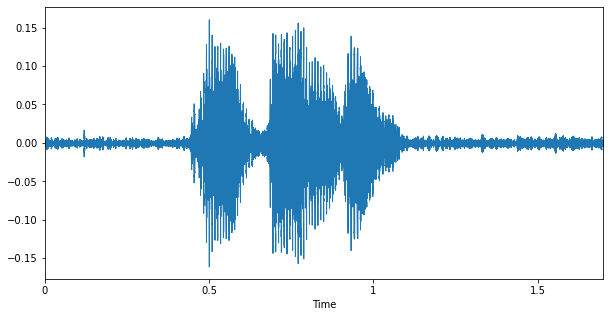

In [5]:
plt.figure(figsize=(10, 5))
librosa.display.waveplot(y, sr=sr)

### We need to apply a Fast Fourier transform to visualize the spectrum
- Notice how most of the speech signal is concentrated in low frequencies.

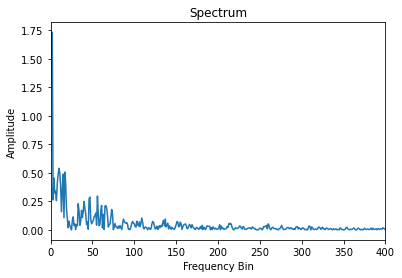

In [7]:
# Appply a FFT to our signal
n_fft=2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))

plt.xlim(0, 400)
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

### We need to apply a Short-time Fourier transform and then convert to a log scale for visualizing the spectrogram


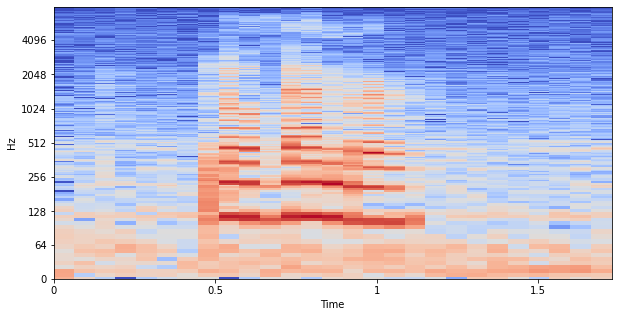

In [10]:
hop_length=1024

### START CODE HERE ###
# Hint..
# Appply stft to our signal like last time but now we computing DFT on a time-series (should be more simple).

y_stft = 

#Convert an amplitude spectrogram to dB-scaled spectrogram.

y_db = 

### END CODE HERE ###

## Plot spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(y_db, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time')

# Extract Melspectrogram and MFCC with librosa

### Simple Method

In [14]:
y, sr = librosa.load(audio, sr=16000)
my_mfcc = librosa.feature.mfcc(y=y, sr=sr)
print(my_mfcc)

[[-468.90536    -466.18674    -467.65518    ... -464.9103
  -467.73865    -473.01      ]
 [ 108.08021     108.49103     108.63214    ...  110.365
   109.4308      109.60148   ]
 [  16.919437     21.363747     21.034538   ...   19.603214
    21.81285      23.217796  ]
 ...
 [  10.29232       9.833668      7.855468   ...    2.7977767
     4.97297       5.0901995 ]
 [  -4.4333596    -3.272796     -2.9045534  ...    1.2865922
    -2.2123957    -4.8157434 ]
 [   0.61239916   -3.1966183    -4.0152507  ...   -2.361408
    -6.1263995    -7.698302  ]]


In [15]:
print("MFCC shape:", my_mfcc.shape)

MFCC shape: (20, 54)


- What is 20? what is 54?
- 20 refers to the number of mfcc's while 54 is the time dimension.

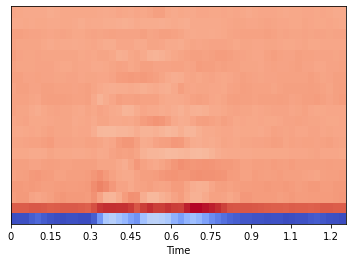

In [16]:
fig, ax = plt.subplots()
img = librosa.display.specshow(my_mfcc, x_axis='time', ax=ax)

In [17]:
### START CODE HERE ###

my_mfcc_13 = 

### END CODE HERE ###

print(my_mfcc_13)
print("MFCC shape:", my_mfcc_13.shape)

[[-4.68905365e+02 -4.66186737e+02 -4.67655182e+02 -4.46550873e+02
  -4.31617737e+02 -4.47335358e+02 -4.60794952e+02 -4.68493713e+02
  -4.70911926e+02 -4.67343292e+02 -4.67342163e+02 -4.71702026e+02
  -4.73056152e+02 -4.45522400e+02 -3.54802917e+02 -2.50604050e+02
  -2.29433136e+02 -2.62187378e+02 -2.91393280e+02 -3.33728271e+02
  -3.61984863e+02 -2.67768555e+02 -2.20452881e+02 -2.20020599e+02
  -2.28012283e+02 -2.49164810e+02 -3.04360046e+02 -3.39841309e+02
  -2.99617645e+02 -2.73813934e+02 -2.97321777e+02 -3.33727234e+02
  -3.73685638e+02 -3.95972626e+02 -4.18256287e+02 -4.36139435e+02
  -4.45367554e+02 -4.55299042e+02 -4.56851837e+02 -4.60425690e+02
  -4.61836792e+02 -4.65341797e+02 -4.64514221e+02 -4.63502960e+02
  -4.70920074e+02 -4.69617432e+02 -4.64326324e+02 -4.63203583e+02
  -4.53465973e+02 -4.48088013e+02 -4.57179230e+02 -4.64910309e+02
  -4.67738647e+02 -4.73010010e+02]
 [ 1.08080208e+02  1.08491028e+02  1.08632141e+02  1.13154892e+02
   1.14716492e+02  1.11728424e+02  1.0642

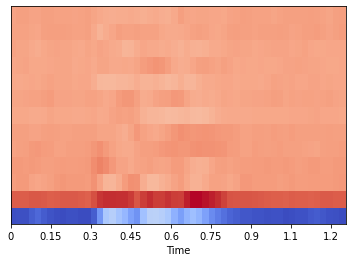

In [18]:
fig, ax = plt.subplots()
img = librosa.display.specshow(my_mfcc_13, x_axis='time', ax=ax)

### We can also extract MFCCs after computing a custom log-melspectrogram

In [19]:
n_mfcc = 13
n_mels = 40
n_fft = 512
win_length = 400 
hop_length = 160 
window = 'hamming'
fmin = 20
fmax = 4000

y, sr = librosa.load(audio, sr=16000)

### START CODE HERE ###
# Insert correct parameters for librosa.stft(), librosa.feature.melspectrogram(), and librosa.feature.mfcc()

D = np.abs(librosa.stft(##))**2
    
S = librosa.feature.melspectrogram(##)
    
S_log = librosa.power_to_db(S)
    
final_mfcc = librosa.feature.mfcc(##)

### END CODE HERE ###

print(final_mfcc.shape)

(13, 170)


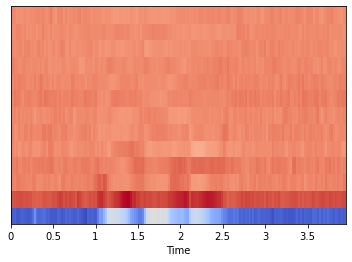

In [20]:
fig, ax = plt.subplots()
img = librosa.display.specshow(final_mfcc, x_axis='time', ax=ax)

# Extract MFCC with Kaldi
- It is easier if you work directly in your linux terminal but to display outputs I will use jupyter
- git clone https://github.com/abnerLing/torgo-speech_processing in the kaldi/egs/ folder if you haven't already
- work in the ./asr folder

## Create kaldi-required files for the 1 uttereance
- put files under data/ex2 (or whatever you want to name the folder)

In [21]:
!cd /home/abner/work/kaldi/egs/torgo-speech_processing/asr/data/ex2 && ls

spk2utt  utt2spk  wav.scp


In [22]:
!cd /home/abner/work/kaldi/egs/torgo-speech_processing/asr/data/ex2 && head *

==> spk2utt <==
november november

==> utt2spk <==
november november

==> wav.scp <==
november  /home/abner/work/data/torgo/MC01/Session2/wav_headMic/MC01_2_head_0019.wav


### To extract MFCCs, Kaldi requires wav.scp, spk2utt, utt2spk, and an mfcc.conf file

In [23]:
!cd /home/abner/work/kaldi/egs/torgo-speech_processing/asr/conf/ && ls

decode.config  decode_dnn.config  mfcc.conf


In [24]:
## run ./steps/make_mfcc.sh --nj 1 data/ex2 exp/make_mfcc/ex2 

In [25]:
!cd /home/abner/work/kaldi/egs/torgo-speech_processing/asr/ && steps/make_mfcc.sh --nj 1 data/ex2 exp/make_mfcc/ex2 

steps/make_mfcc.sh --nj 1 data/ex2 exp/make_mfcc/ex2
utils/validate_data_dir.sh: WARNING: you have only one speaker.  This probably a bad idea.
   Search for the word 'bold' in http://kaldi-asr.org/doc/data_prep.html
   for more information.
utils/validate_data_dir.sh: Successfully validated data-directory data/ex2
steps/make_mfcc.sh: [info]: no segments file exists: assuming wav.scp indexed by utterance.
steps/make_mfcc.sh: Succeeded creating MFCC features for ex2


### You should now have several new files

In [26]:
!cd /home/abner/work/kaldi/egs/torgo-speech_processing/asr/data/ex2 && ls

conf  feats.scp    spk2utt  utt2num_frames  wav.scp
data  frame_shift  utt2dur  utt2spk


### The actual MFCC are located in the data folder as an ARK file

In [27]:
!cd /home/abner/work/kaldi/egs/torgo-speech_processing/asr/data/ex2/data && ls

raw_mfcc_ex2.1.ark  raw_mfcc_ex2.1.scp


In [28]:
#!pip install kaldiio ## useful for reading ARK files

import kaldiio

In [29]:
my_ark = "/home/abner/work/kaldi/egs/torgo-speech_processing/asr/data/ex2/data/raw_mfcc_ex2.1.ark"

d = kaldiio.load_ark(my_ark)
for key, numpy_array in d:
    kaldi_mfccs = numpy_array

In [31]:
print(kaldi_mfccs)
print(kaldi_mfccs.shape)

[[ 1.4727230e+01 -3.7747312e+00 -2.8352487e+00 ...  9.6436806e+00
   9.5496225e+00  8.7289339e-01]
 [ 1.5188060e+01 -3.1538134e+00 -4.3553853e-01 ...  1.0832787e+01
   1.0912485e+01  9.7711945e+00]
 [ 1.4963332e+01 -5.1940656e+00  3.1140327e+00 ...  8.5007095e-01
   1.2194566e+01  1.2799239e+01]
 ...
 [ 1.4994812e+01 -3.0296297e+00  1.7641959e+00 ...  1.0027494e+00
   1.3754169e+01  1.3666615e+01]
 [ 1.5381308e+01 -4.2714653e+00  2.4641113e+00 ...  1.0336876e-02
   1.0656948e+01  1.2510114e+01]
 [ 1.5149410e+01 -2.0361614e+00  2.1641474e+00 ...  3.7509699e+00
   1.4793905e+01  1.3666615e+01]]
(168, 13)


In [32]:
# transpose matrix so we can plot with librosa
kaldi_mfccs = kaldi_mfccs.T

In [33]:
print(kaldi_mfccs.shape)
print(final_mfcc.shape) #librosa

(13, 168)
(13, 170)


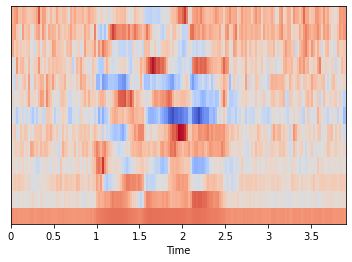

In [35]:
fig, ax = plt.subplots()
img = librosa.display.specshow(kaldi_mfccs, x_axis='time', ax=ax)

## Slightly different, but that's because we are using Kaldi's default parameters.


# Final Task
### Using Kaldi, extract all MFCCs from the TORGO train and test sets and put in a MFCC folder 
e.g.

In [36]:
!ls /home/abner/work/kaldi/egs/torgo-speech_processing/asr/mfcc

raw_mfcc_test.1.ark   raw_mfcc_train.3.ark  raw_mfcc_train.6.ark
raw_mfcc_test.1.scp   raw_mfcc_train.3.scp  raw_mfcc_train.6.scp
raw_mfcc_train.1.ark  raw_mfcc_train.4.ark  raw_mfcc_train.7.ark
raw_mfcc_train.1.scp  raw_mfcc_train.4.scp  raw_mfcc_train.7.scp
raw_mfcc_train.2.ark  raw_mfcc_train.5.ark  raw_mfcc_train.8.ark
raw_mfcc_train.2.scp  raw_mfcc_train.5.scp  raw_mfcc_train.8.scp
